In [3]:
# Download MNIST dataset https://www.kaggle.com/c/digit-recognizer/data
# Load MNIST data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./mnist/train.csv')

#print first 5 rows
print(d0.head(5))

#save label into a variables l, whole column label
l = d0['label']

# drop label and save the pixels in d
d = d0.drop("label", axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


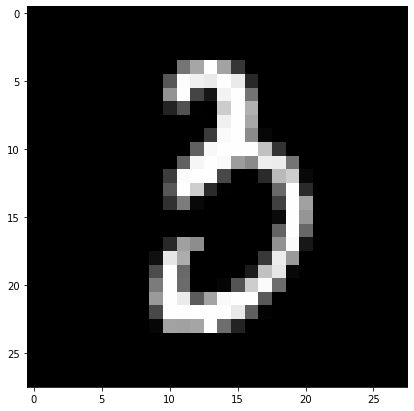

3


In [5]:
plt.figure(figsize=(7,7))
idx = 150

grid_data = d.iloc[idx].values.reshape(28, 28);
plt.imshow(grid_data, interpolation = 'none', cmap='gray')
plt.show()

print(l[idx])


In [6]:
#Pick 15K data points

labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data = ", data.shape)

The shape of sample data =  (15000, 784)


In [7]:
# Data pre-processing: Standardization of data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data);
print(standardized_data.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
# find covariance A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of the covaraince matrix ", covar_matrix.shape)


The shape of the covaraince matrix  (784, 784)


In [9]:
# finding top 2 eigen values and eigen vector 
# project it in 2-Dimension

from scipy.linalg import eigh

# eigh returns the eigen vectors in ascending order
# this generates the top 2 eigen vectors(782, 783)
values, vectors = eigh( covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors ", vectors.shape)

vectors = vectors.T

print("Updated shape of the eigen vectors: ",vectors.shape);


Shape of eigen vectors  (784, 2)
Updated shape of the eigen vectors:  (2, 784)


In [10]:
import matplotlib.pyplot as plt

new_coordinates = np.matmul(vectors, sample_data.T)

print("Resultant new data points shape ",vectors.shape, "X",sample_data.T.shape, "=", new_coordinates.shape)

Resultant new data points shape  (2, 784) X (784, 15000) = (2, 15000)


In [11]:
import pandas as pd

# adding labels to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal", "2nd principal","labels"))
print(dataframe.head())


   1st principal  2nd principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


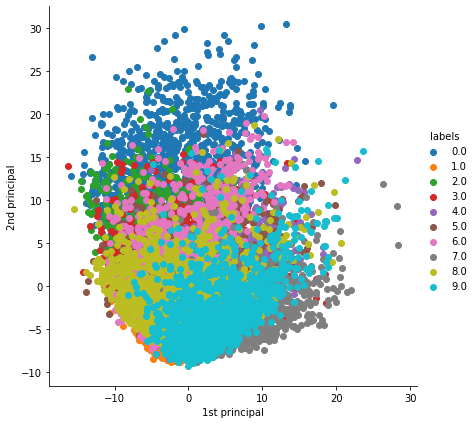

In [12]:
# plotting the data

import seaborn as sn

sn.FacetGrid(dataframe, hue="labels", height=6).map(plt.scatter, "1st principal", "2nd principal").add_legend()
plt.show();


In [13]:
# PCA using the scikit-learn

from sklearn import decomposition

pca = decomposition.PCA()

In [14]:
# configure the paramater 
# the no of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("Shape of the pca_reduced.shape = ",pca_data.shape)


Shape of the pca_reduced.shape =  (15000, 2)


pca shape:  (15000, 3)


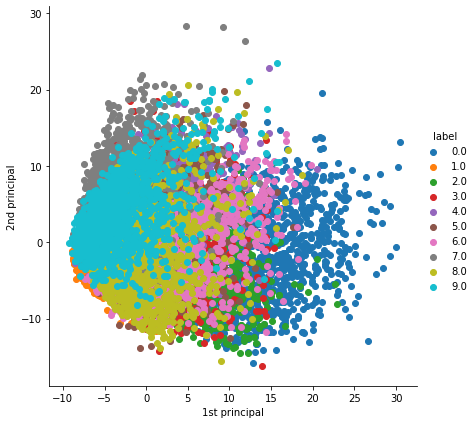

In [15]:
# attaching labels for each 2-d data points
pca_data = np.vstack((pca_data.T, labels)).T

print("pca shape: ", pca_data.shape)

# creating a new datafame
pca_df = pd.DataFrame(data=pca_data, columns=("1st principal", "2nd principal","label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, "1st principal", "2nd principal").add_legend()
plt.show()


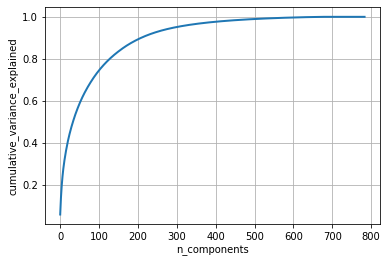

In [16]:
# PCA for dimensional reduction

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/ np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained);

plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth =2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_variance_explained')
plt.show()

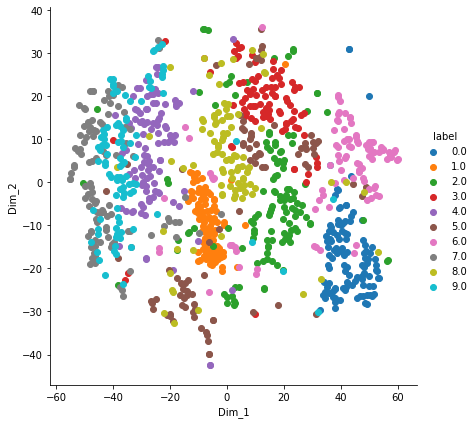

In [18]:
# t-SNE
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components = 2, random_state=0)
# default perplexity =30
# default iteration of operations = 1000

tsne_data = model.fit_transform(data_1000)

#creating a new dataframe which will help in plotting the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of tsne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend();
plt.show();

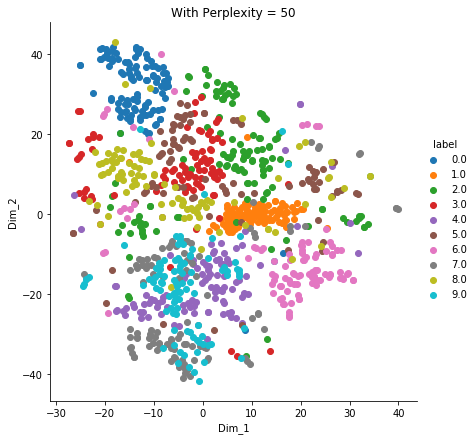

In [19]:
model = TSNE(n_components = 2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000)

#creating a new dataframe which will help in plotting the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of tsne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend();
plt.title('With Perplexity = 50')
plt.show();

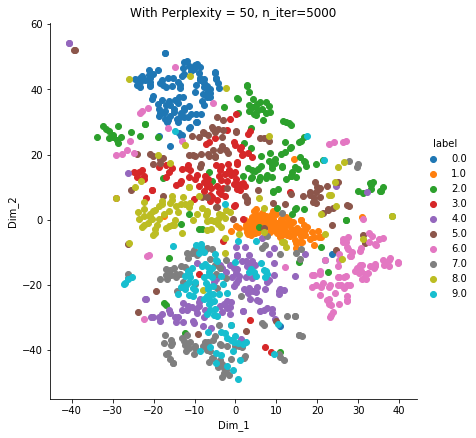

In [20]:
model = TSNE(n_components = 2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)

#creating a new dataframe which will help in plotting the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of tsne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend();
plt.title('With Perplexity = 50, n_iter=5000')
plt.show();

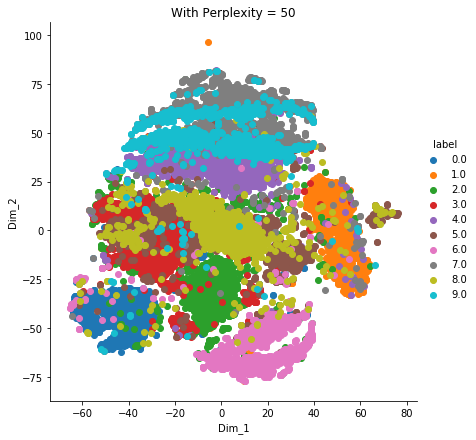

In [21]:
from sklearn.manifold import TSNE

data_15000 = standardized_data[0:15000,:]
labels_15000 = labels[0:15000]

model = TSNE(n_components = 2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_15000)

#creating a new dataframe which will help in plotting the result
tsne_data = np.vstack((tsne_data.T, labels_15000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

#Plotting the result of tsne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend();
plt.title('With Perplexity = 50')
plt.show();